# Using Ragas to Evaluate a RAG Application built with LangChain and LangGraph

In the following notebook, we'll be looking at how [Ragas](https://github.com/explodinggradients/ragas) can be helpful in a number of ways when looking to evaluate your RAG applications!

While this example is rooted in LangChain/LangGraph - Ragas is framework agnostic (you don't even need to be using a framework!).

- 🤝 Breakout Room #1
  1. Task 1: Installing Required Libraries
  2. Task 2: Set Environment Variables
  3. Task 3: Synthetic Dataset Generation for Evaluation using Ragas
  4. Task 4: Evaluating our Pipeline with Ragas
  5. Task 6: Making Adjustments and Re-Evaluating

But first! Let's set some dependencies!

## Dependencies and API Keys:

We'll also need to provide our API keys.

First, OpenAI's for our LLM/embedding model combination!

In [1]:
import os
from getpass import getpass
os.environ["OPENAI_API_KEY"] = getpass("Please enter your OpenAI API key!")

## Generating Synthetic Test Data

We wil be using Ragas to build out a set of synthetic test questions, references, and reference contexts. This is useful because it will allow us to find out how our system is performing.

> NOTE: Ragas is best suited for finding *directional* changes in your LLM-based systems. The absolute scores aren't comparable in a vacuum.

### Data Preparation

We'll prepare our data - which should hopefull be familiar at this point since it's our **"How people use AI" Data** use-case!

Next, let's load our data into a familiar LangChain format using the `DirectoryLoader`.

In [2]:
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import PyMuPDFLoader


path = "data/"
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyMuPDFLoader)
docs = loader.load()

### Knowledge Graph Based Synthetic Generation

Ragas uses a knowledge graph based approach to create data. This is extremely useful as it allows us to create complex queries rather simply. The additional testset complexity allows us to evaluate larger problems more effectively, as systems tend to be very strong on simple evaluation tasks.

Let's start by defining our `generator_llm` (which will generate our questions, summaries, and more), and our `generator_embeddings` which will be useful in building our graph.

### Abstracted SDG

The above method is the full process - but we can shortcut that using the provided abstractions!

This will generate our knowledge graph under the hood, and will - from there - generate our personas and scenarios to construct our queries.



In [3]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
generator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1"))
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

In [4]:
from ragas.testset import TestsetGenerator

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)
dataset = generator.generate_with_langchain_docs(docs, testset_size=10)

Applying HeadlinesExtractor:   0%|          | 0/21 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/64 [00:00<?, ?it/s]

unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to ap

Applying SummaryExtractor:   0%|          | 0/38 [00:00<?, ?it/s]

Property 'summary' already exists in node '1bef2b'. Skipping!
Property 'summary' already exists in node 'a61ed9'. Skipping!
Property 'summary' already exists in node 'd112de'. Skipping!
Property 'summary' already exists in node '4a56f5'. Skipping!
Property 'summary' already exists in node '7fc847'. Skipping!
Property 'summary' already exists in node '57dd4e'. Skipping!
Property 'summary' already exists in node '30932d'. Skipping!
Property 'summary' already exists in node 'eebf25'. Skipping!
Property 'summary' already exists in node '4cacaa'. Skipping!
Property 'summary' already exists in node '1146ec'. Skipping!
Property 'summary' already exists in node '5fc366'. Skipping!
Property 'summary' already exists in node 'befc1f'. Skipping!
Property 'summary' already exists in node '4b23a3'. Skipping!
Property 'summary' already exists in node '50509a'. Skipping!
Property 'summary' already exists in node '4405a1'. Skipping!
Property 'summary' already exists in node '089f0c'. Skipping!
Property

Applying CustomNodeFilter:   0%|          | 0/8 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/48 [00:00<?, ?it/s]

Property 'summary_embedding' already exists in node '4405a1'. Skipping!
Property 'summary_embedding' already exists in node '37d72f'. Skipping!
Property 'summary_embedding' already exists in node '5fc366'. Skipping!
Property 'summary_embedding' already exists in node '50509a'. Skipping!
Property 'summary_embedding' already exists in node '1146ec'. Skipping!
Property 'summary_embedding' already exists in node 'a61ed9'. Skipping!
Property 'summary_embedding' already exists in node '7fc847'. Skipping!
Property 'summary_embedding' already exists in node '1bef2b'. Skipping!
Property 'summary_embedding' already exists in node '4cacaa'. Skipping!
Property 'summary_embedding' already exists in node 'befc1f'. Skipping!
Property 'summary_embedding' already exists in node '4b23a3'. Skipping!
Property 'summary_embedding' already exists in node '57dd4e'. Skipping!
Property 'summary_embedding' already exists in node 'd112de'. Skipping!
Property 'summary_embedding' already exists in node '4a56f5'. Sk

Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating personas:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Samples:   0%|          | 0/12 [00:00<?, ?it/s]

In [5]:
dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,How did ChatGPT's global usage and message vol...,[Introduction ChatGPT launched in November 202...,"By July 2025, ChatGPT had reached 700 million ...",single_hop_specifc_query_synthesizer
1,Could you provide a detailed breakdown of the ...,[Month Non-Work (M) (%) Work (M) (%) Total Mes...,"In Jun 2025, the total number of messages was ...",single_hop_specifc_query_synthesizer
2,How does the proportion of computer programmin...,[Table 1: ChatGPT daily message counts (millio...,"According to the context, only 4.2% of ChatGPT...",single_hop_specifc_query_synthesizer
3,what Figure 23 say about who use ChatGPT for w...,[Variation by Occupation Figure 23 presents va...,Figure 23 shows variation in ChatGPT usage by ...,single_hop_specifc_query_synthesizer
4,How does the increase in non-work messages bet...,[<1-hop>\n\nMonth Non-Work (M) (%) Work (M) (%...,"Between June 2024 and June 2025, the number of...",multi_hop_abstract_query_synthesizer
5,How does the variation in ChatGPT usage by occ...,[<1-hop>\n\nVariation by Occupation Figure 23 ...,Variation in ChatGPT usage by occupation is si...,multi_hop_abstract_query_synthesizer
6,Based on the provided message volume statistic...,[<1-hop>\n\nMonth Non-Work (M) (%) Work (M) (%...,"Between June 2024 and June 2025, ChatGPT's tot...",multi_hop_abstract_query_synthesizer
7,how much chatgpt message volume grow year over...,[<1-hop>\n\nMonth Non-Work (M) (%) Work (M) (%...,chatgpt message volume grow from 451 million d...,multi_hop_abstract_query_synthesizer
8,how chatgpt usage change from jun 2025 to july...,[<1-hop>\n\nConclusion This paper studies the ...,"from jun 2025 to july 2025, chatgpt usage keep...",multi_hop_specific_query_synthesizer
9,"how chatgpt used in us for work and not work, ...",[<1-hop>\n\nTable 1: ChatGPT daily message cou...,"in us, chatgpt messages for non-work use have ...",multi_hop_specific_query_synthesizer


## LangChain RAG

Now we'll construct our LangChain RAG, which we will be evaluating using the above created test data!

### R - Retrieval

Let's start with building our retrieval pipeline, which will involve loading the same data we used to create our synthetic test set above.

> NOTE: We need to use the same data - as our test set is specifically designed for this data.

In [6]:
path = "data/"
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyMuPDFLoader)
docs = loader.load()

Now that we have our data loaded, let's split it into chunks!

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=0)
split_documents = text_splitter.split_documents(docs)
len(split_documents)

3122

#### ❓ Question: 

What is the purpose of the `chunk_overlap` parameter in the `RecursiveCharacterTextSplitter`?

##### ✅ Answer:
Chunk overlaping helps preserving the meaning of sentences that might get splitted and lost by the imposed specified chunck limit/boundary. It does this by overlaping a sequence of characters between consecutive chunks.

Next up, we'll need to provide an embedding model that we can use to construct our vector store.

In [8]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

Now we can build our in memory QDrant vector store.

In [9]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams

client = QdrantClient(":memory:")

client.create_collection(
    collection_name="use_case_data",
    vectors_config=VectorParams(size=1536, distance=Distance.COSINE),
)

vector_store = QdrantVectorStore(
    client=client,
    collection_name="use_case_data",
    embedding=embeddings,
)

We can now add our documents to our vector store.

In [10]:
_ = vector_store.add_documents(documents=split_documents)

Let's define our retriever.

In [11]:
retriever = vector_store.as_retriever(search_kwargs={"k": 3})

Now we can produce a node for retrieval!

In [12]:
def retrieve(state):
  retrieved_docs = retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

### Augmented

Let's create a simple RAG prompt!

In [12]:
from langchain.prompts import ChatPromptTemplate

RAG_PROMPT = """\
You are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.

### Question
{question}

### Context
{context}
"""

rag_prompt = ChatPromptTemplate.from_template(RAG_PROMPT)

### Generation

We'll also need an LLM to generate responses - we'll use `gpt-4o-nano` to avoid using the same model as our judge model.

In [13]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4.1-nano")

Then we can create a `generate` node!

In [15]:
def generate(state):
  docs_content = "\n\n".join(doc.page_content for doc in state["context"])
  messages = rag_prompt.format_messages(question=state["question"], context=docs_content)
  response = llm.invoke(messages)
  return {"response" : response.content}

### Building RAG Graph with LangGraph

Let's create some state for our LangGraph RAG graph!

In [16]:
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class State(TypedDict):
  question: str
  context: List[Document]
  response: str

Now we can build our simple graph!

> NOTE: We're using `add_sequence` since we will always move from retrieval to generation. This is essentially building a chain in LangGraph.

In [17]:
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

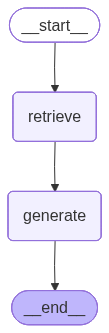

In [18]:
graph

Let's do a test to make sure it's doing what we'd expect.

In [19]:
response = graph.invoke({"question" : "What are the different kinds of loans?"})

NameError: name 'rag_prompt' is not defined

In [18]:
response["response"]

'The provided context does not contain information about the different kinds of loans.'

## Evaluating the App with Ragas

Now we can finally do our evaluation!

We'll start by running the queries we generated usign SDG above through our application to get context and responses.

In [19]:
for test_row in dataset:
  response = graph.invoke({"question" : test_row.eval_sample.user_input})
  test_row.eval_sample.response = response["response"]
  test_row.eval_sample.retrieved_contexts = [context.page_content for context in response["context"]]

In [20]:
dataset.samples[0].eval_sample.response

'Acemoglu (2024) contributes to the discussion on artificial intelligence by studying the rapid growth of ChatGPT.'

Then we can convert that table into a `EvaluationDataset` which will make the process of evaluation smoother.

In [21]:
from ragas import EvaluationDataset

evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())

We'll need to select a judge model - in this case we're using the same model that was used to generate our Synthetic Data.

In [22]:
from ragas import evaluate
from ragas.llms import LangchainLLMWrapper

evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1-mini"))

Next up - we simply evaluate on our desired metrics!

In [23]:
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness, ResponseRelevancy, ContextEntityRecall, NoiseSensitivity
from ragas import evaluate, RunConfig

custom_run_config = RunConfig(timeout=360)

baseline_result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
baseline_result

Evaluating:   0%|          | 0/66 [00:00<?, ?it/s]

{'context_recall': 0.0909, 'faithfulness': 0.5801, 'factual_correctness': 0.2591, 'answer_relevancy': 0.3322, 'context_entity_recall': 0.2404, 'noise_sensitivity_relevant': 0.0152}

## Making Adjustments and Re-Evaluating

Now that we've got our baseline - let's make a change and see how the model improves or doesn't improve!

> NOTE: This will be using Cohere's Rerank model - please be sure to [sign-up for an API key!](https://docs.cohere.com/reference/about)

In [24]:
os.environ["COHERE_API_KEY"] = getpass("Please enter your Cohere API key!")


We'll first set our retriever to return more documents, which will allow us to take advantage of the reranking.

In [25]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=30)
split_documents = text_splitter.split_documents(docs)
len(split_documents)

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

client = QdrantClient(":memory:")

client.create_collection(
    collection_name="use_case_data_new_chunks",
    vectors_config=VectorParams(size=1536, distance=Distance.COSINE),
)

vector_store = QdrantVectorStore(
    client=client,
    collection_name="use_case_data_new_chunks",
    embedding=embeddings,
)

_ = vector_store.add_documents(documents=split_documents)

adjusted_example_retriever = vector_store.as_retriever(search_kwargs={"k": 20})

Reranking, or contextual compression, is a technique that uses a reranker to compress the retrieved documents into a smaller set of documents.

This is essentially a slower, more accurate form of semantic similarity that we use on a smaller subset of our documents.

In [26]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain_cohere import CohereRerank

def retrieve_adjusted(state):
  compressor = CohereRerank(model="rerank-v3.5")
  compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=adjusted_example_retriever, search_kwargs={"k": 5}
  )
  retrieved_docs = compression_retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

We can simply rebuild our graph with the new retriever!

In [27]:
class AdjustedState(TypedDict):
  question: str
  context: List[Document]
  response: str

adjusted_graph_builder = StateGraph(AdjustedState).add_sequence([retrieve_adjusted, generate])
adjusted_graph_builder.add_edge(START, "retrieve_adjusted")
adjusted_graph = adjusted_graph_builder.compile()

In [28]:
response = adjusted_graph.invoke({"question" : "What are the different kinds of loans?"})
response["response"]

'The provided context does not mention or discuss different kinds of loans.'

In [31]:
import time
import copy

rerank_dataset = copy.deepcopy(dataset)

for test_row in rerank_dataset:
  response = adjusted_graph.invoke({"question" : test_row.eval_sample.user_input})
  test_row.eval_sample.response = response["response"]
  test_row.eval_sample.retrieved_contexts = [context.page_content for context in response["context"]]
  time.sleep(4) # To try to avoid rate limiting.

TooManyRequestsError: status_code: 429, body: data=None id='b64c759a-1d6e-4953-a26e-25ce99ee3f86' message="You are using a Trial key, which is limited to 10 API calls / minute. You can continue to use the Trial key for free or upgrade to a Production key with higher rate limits at 'https://dashboard.cohere.com/api-keys'. Contact us on 'https://discord.gg/XW44jPfYJu' or email us at support@cohere.com with any questions"

In [70]:
rerank_dataset.samples[0].eval_sample.response

'During 2024, key trends in ChatGPT consumer adoption and usage patterns included significant growth in user engagement and a dominant position relative to other chatbots. According to Bick et al. (2024), 28% of US adults used ChatGPT in late 2024, which was higher than any other chatbot. Additionally, Wiggers (2025) reports that in April 2025, ChatGPT received more than ten times as many visitors as other prominent chatbots like Claude or Copilot, indicating a substantial lead in user traffic.\n\nIn terms of usage patterns, there was a decline in help declined from 12% in July 2024 to around 5% a year later, possibly due to increased use of LLMs for programming outside of ChatGPT through APIs, code editing, and autonomous programming agents such as Codex. Multimedia usage saw an increase from 2% to just over 7%, with a notable spike in April 2025 following the release of new image-generation capabilities, although this elevated level persisted afterward.\n\nCompared to other chatbots,

In [71]:
rerank_evaluation_dataset = EvaluationDataset.from_pandas(rerank_dataset.to_pandas())

In [ ]:
rerank_result = evaluate(
    dataset=rerank_evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
rerank_result

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

Exception raised in Job[38]: AttributeError('StringIO' object has no attribute 'statements')
Exception raised in Job[47]: AttributeError('StringIO' object has no attribute 'statements')


{'context_recall': 0.6581, 'faithfulness': 0.8228, 'factual_correctness': 0.5600, 'answer_relevancy': 0.9421, 'context_entity_recall': 0.4322, 'noise_sensitivity_relevant': 0.2296}

#### ❓ Question: 

Which system performed better, on what metrics, and why?